In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns

### Load dataset

In [3]:
def numeric_columns(df):
    numeric_cols = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numeric_cols.append(col)
    return numeric_cols

# Load dataset
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_4.csv")

# Use function to extract numeric columns
numeric_cols = numeric_columns(df)

df_num = df[numeric_cols]

print(df_num.shape)
print(df_num.columns)


(4474, 57)
Index(['Ammonium', 'Ammonium std', 'Chlorophyll a', 'Depth bathy', 'Depth bot',
       'Depth top', 'Functional evenness', 'Functional richness', 'Iron',
       'Iron std', 'Latitude', 'Longitude', 'Max Lyapunov Exp', 'NPP Carbon',
       'NPP Carbon 30', 'Nitrate', 'Nitrate std', 'Nitrite', 'Nitrite std',
       'Okubo-Weiss', 'Particulate Inorganic Carbon',
       'Particulate Organic Carbon', 'Phosphate max', 'Phosphate med',
       'Phosphate min', 'Radiation', 'Radiation 30', 'Radiation 8.1',
       'Radiation 8.2', 'Residence time', 'SILVA_Chao', 'SILVA_Shannon',
       'SILVA_ace', 'SILVA_func_diversity', 'SILVA_species_rich',
       'Sea Surface Temp', 'Sea ice conc', 'Sea ice free days',
       'Sea ice free end', 'Sea ice free start', 'Sea Surface Chlorophyll a',
       'Sea Surface Fluorescence', 'Sea Surface Quantum Fluorescence',
       'Sea surface temp grad', 'Shannon_Darwin_mean_all',
       'Shannon_Darwin_mean_grp', 'Shannon_Darwin_month_all',
       'Shann

In [30]:
df_measurements = df[['Ammonium', 'Ammonium std', 'Chlorophyll a',
                      'Depth bathy', 'Depth bot', 'Depth top',
                      'Functional evenness', 'Functional richness', 'Iron', 
                      'Iron std',  'Max Lyapunov Exp', 
                      'Net PP carbon', 'Net PP carbon 30',
                      'Nitrate', 'Nitrate std', 'Nitrite', 'Nitrite std',
                      'Okubo-Weiss', 'Particulate Inorganic Carbon',
                      'Particulate Organic Carbon',
                      'Phosphate max', 'Phosphate median', 'Phosphate min',
                      'Radiation', 'Radiation 30', 'Radiation 8.1', 'Radiation 8.2',
                      'SILVA_Chao', 'SILVA_Shannon', 'SILVA_ace',
                      'SILVA_func_diversity', 'SILVA_species_rich', 
                      'Sea Surface Temp', 'Sea ice conc', 'Sea ice free days',
                      'Sea ice free end', 'Sea ice free start', 'Sea surface chlorophyll a',
                      'Sea surface fluorescence', 'Sea surface quantum fluorescence',
                      'Sea surface temp grad', 'Shannon_Darwin_mean_all',
                      'Shannon_Darwin_mean_grp', 'Shannon_Darwin_month_all',
                      'Shannon_Darwin_month_grp', 'Shannon_Physat_mean',
                      'Shannon_Physat_month', 'Strain sub-mesoscale', 'Sunshine duration',
                      'Total suspended matter', 'u', 'v', 'MHWs']]


# exclude: 'Latitude', 'Longitude', 'Residence time', 

# Classifier #1 (number of heatwaves - 0, 1, 2+)

### Final model

In [47]:
# Load dataset
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_3.csv")

# Use function to extract numeric columns
numeric_cols = numeric_columns(df)

df_num = df[numeric_cols]

print(df_num.columns)
print(df_num['MHW_count'].value_counts())


# Replace values in 'count'
count_replace = {
    0: '0',
    1: '1',
    2: '2+',
    3: '2+',
}

# Apply replacements to 'MHWs count'
df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)


print(df_num['MHW_count'].value_counts())

# Shuffle the DataFrame
shuffled_df_num = shuffle(df_num, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df_num.drop(['MHW_count'], axis=1)
y = shuffled_df_num['MHW_count']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=72)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


clf = DecisionTreeClassifier(random_state=43,
                                class_weight='balanced',
                                criterion='entropy',
                                max_depth=8, min_samples_split=60,
                                min_samples_leaf=40, max_features=None
                                )

# Define KFold with shuffle=True
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with shuffled data
cv_scores = cross_val_score(clf, X, y, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


# Train Decision Tree Classifier on full training data
clf.fit(X_train, y_train)

# Model Evaluation on test data
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Get the class names in the correct order
class_names = clf.classes_

# # Plot Decision Tree
# plt.figure()
# plt.figure(figsize=(36,15))
# plot_tree(clf, 
#           filled=True, 
#           rounded=True, 
#           feature_names=X.columns,
#           class_names=class_names, fontsize=17, precision=1,
#           impurity=True, 
#           label='all'
#           )

# plt.savefig('/Users/annaolsen/Desktop/Speciale/DS_thesis/dt_count_small.png', bbox_inches='tight', dpi=200)

# plt.show()


Index(['Ammonium', 'Ammonium std', 'Chl a', 'Depth bathy', 'Depth bot',
       'Depth top', 'Functional evenness', 'Functional richness', 'Iron',
       'Iron std', 'Latitude', 'Longitude', 'Max Lyapunov Exp', 'NPP Carbon',
       'NPP Carbon 30', 'Nitrate', 'Nitrate std', 'Nitrite', 'Nitrite std',
       'Okubo-Weiss', 'PIC', 'POC', 'Phosphate max', 'Phosphate med',
       'Phosphate min', 'Radiation', 'Radiation 30', 'Radiation 8.1',
       'Radiation 8.2', 'Residence time', 'SILVA_Chao', 'SILVA_Shannon',
       'SILVA_ace', 'SILVA_func_diversity', 'SILVA_species_rich', 'SST',
       'Sea ice conc', 'Sea ice free days', 'Sea ice free end',
       'Sea ice free start', 'SS Chl a', 'SS Fluorescence',
       'SS Quantum Fluorescence', 'SST Grad', 'Shannon_Darwin_mean_all',
       'Shannon_Darwin_mean_grp', 'Shannon_Darwin_month_all',
       'Shannon_Darwin_month_grp', 'Shannon_Physat_mean',
       'Shannon_Physat_month', 'Strain sub-mesoscale', 'Sunshine duration',
       'TSM', 'Year',

/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_63177/1034351057.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)


Cross-validation scores: [0.90848214 0.89508929 0.87723214 0.90401786 0.89709172 0.87472036
 0.91051454 0.91498881 0.88143177 0.91946309]
Mean CV accuracy: 0.898303171939917
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1059
           1       0.74      0.88      0.81       227
          2+       0.53      0.96      0.69        57

    accuracy                           0.90      1343
   macro avg       0.75      0.92      0.81      1343
weighted avg       0.93      0.90      0.91      1343



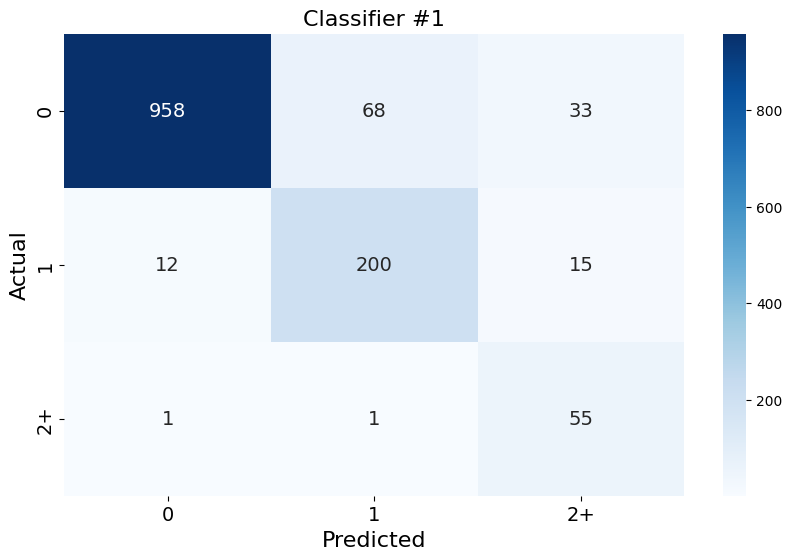

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with larger font size for x- and y-axis tick labels
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=clf.classes_, yticklabels=clf.classes_,
            annot_kws={"size": 14})  # Set font size for annotations

plt.xlabel('Predicted', fontsize=16)  # Set font size for x-axis label
plt.ylabel('Actual', fontsize=16)  # Set font size for y-axis label
plt.title('Classifier #1', fontsize=16)  # Set font size for title

# Set font size for x- and y-axis tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('/Users/annaolsen/Desktop/Speciale/DS_thesis/cm_classifier1.png', bbox_inches='tight', dpi=200)

plt.show()




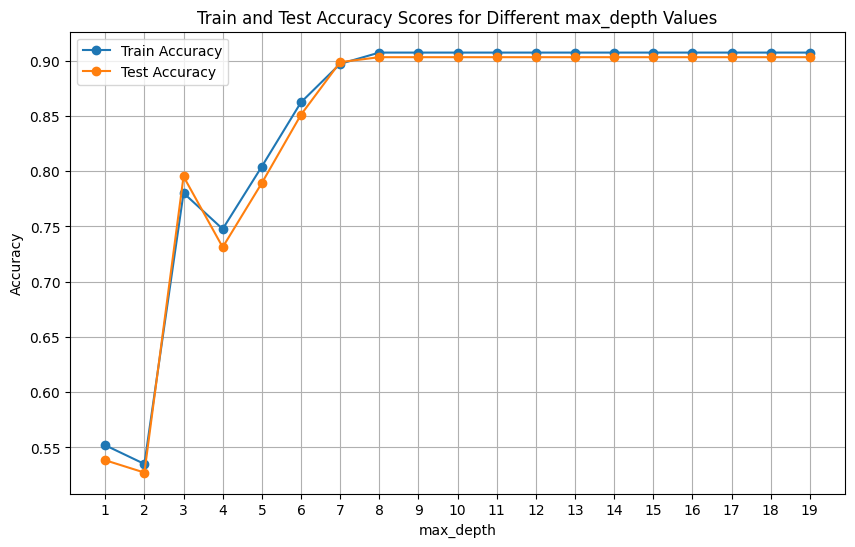

In [98]:
import matplotlib.pyplot as plt

# Define a range of max_depth values to explore
max_depth_values = range(1, 20)  # Adjust the range as needed

# Initialize lists to store train and test accuracy scores
train_scores = []
test_scores = []

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Create a Decision Tree classifier with the current max_depth
    clf = DecisionTreeClassifier(class_weight='balanced', random_state=42,
                                 criterion='entropy', max_depth=max_depth,
                                 min_samples_split=55, min_samples_leaf=40,
                                 max_features=None)

    # Train the classifier on the full training data
    clf.fit(X_train, y_train)

    # Calculate train and test accuracy scores
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    # Append scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot train and test accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(max_depth_values, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy Scores for Different max_depth Values')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.show()


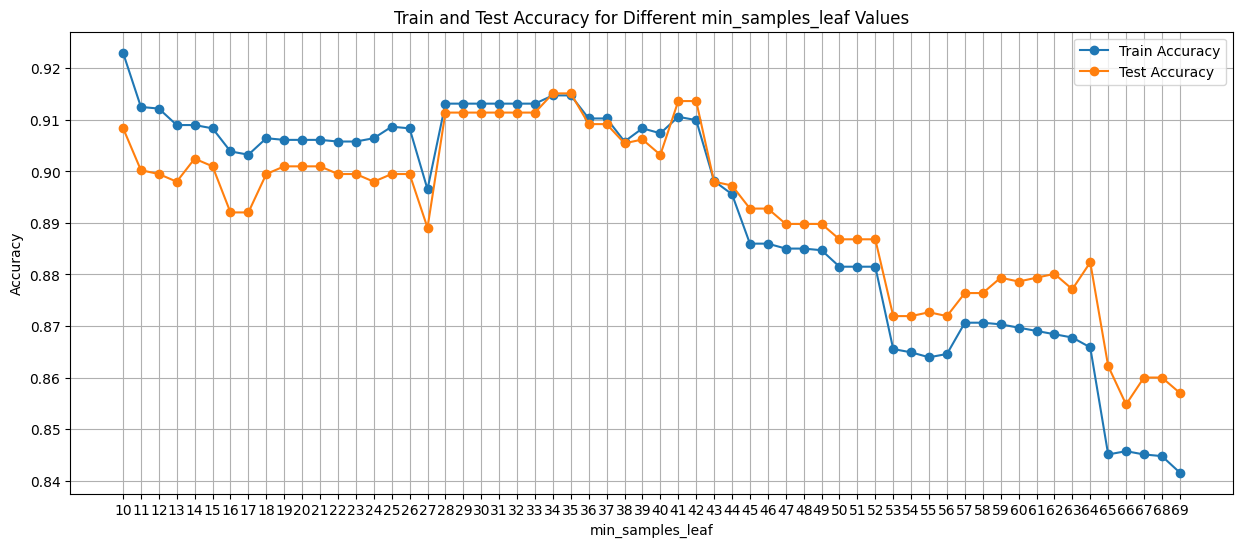

In [103]:
import matplotlib.pyplot as plt

# Define a range of max_depth values to explore
min_samples_leaf_values = range(10, 70)  # Adjust the range as needed

# Initialize lists to store train and test accuracy scores
train_scores = []
test_scores = []

# Iterate over different max_depth values
for min_samples_leaf in min_samples_leaf_values:
    # Create a Decision Tree classifier with the current max_depth
    clf = DecisionTreeClassifier(class_weight='balanced', random_state=42,
                                 criterion='entropy', max_depth=8,
                                 min_samples_split=55, min_samples_leaf=min_samples_leaf,
                                 max_features=None)

    # Train the classifier on the full training data
    clf.fit(X_train, y_train)

    # Calculate train and test accuracy scores
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    # Append scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot train and test accuracy scores
plt.figure(figsize=(15, 6))
plt.plot(min_samples_leaf_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(min_samples_leaf_values, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for Different min_samples_leaf Values')
plt.xticks(min_samples_leaf_values)
plt.legend()
plt.grid(True)
plt.show()


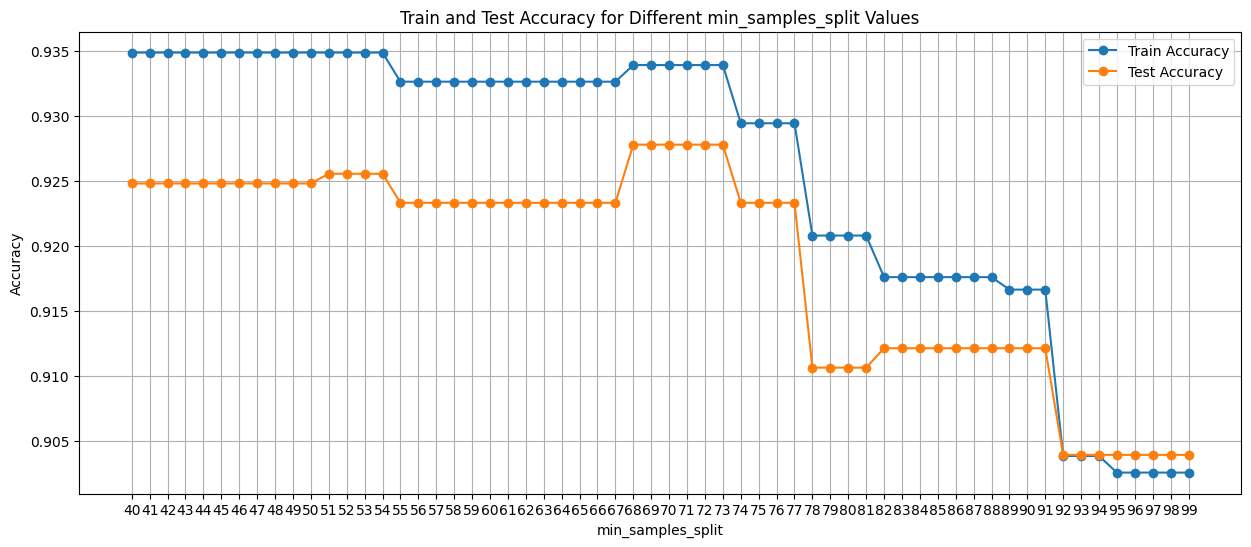

In [121]:
import matplotlib.pyplot as plt

# Define a range of max_depth values to explore
min_samples_split_values = range(40,100)  # Adjust the range as needed

# Initialize lists to store train and test accuracy scores
train_scores = []
test_scores = []

# Iterate over different max_depth values
for min_samples_split in min_samples_split_values:
    # Create a Decision Tree classifier with the current max_depth
    clf = DecisionTreeClassifier(class_weight='balanced', random_state=42,
                                 criterion='entropy', max_depth=None,
                                 min_samples_split=min_samples_split, min_samples_leaf=1,
                                 max_features=None)

    # Train the classifier on the full training data
    clf.fit(X_train, y_train)

    # Calculate train and test accuracy scores
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    # Append scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot train and test accuracy scores
plt.figure(figsize=(15, 6))
plt.plot(min_samples_split_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(min_samples_split_values, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for Different min_samples_split Values')
plt.xticks(min_samples_split_values)
plt.legend()
plt.grid(True)
plt.show()


### GridSearchCV (0, 1, 2+)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_2.csv")

# Use function to extract numeric columns
numeric_cols = numeric_columns(df)

df_num = df[numeric_cols]

print(df_num['MHW_count'].value_counts())

# Replace values in 'count'
count_replace = {
    0: '0',
    1: '1',
    2: '2+',
    3: '2+',
}

# Apply replacements to 'MHWs count'
df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)

print(df_num['MHW_count'].value_counts())

# Shuffle the DataFrame
shuffled_df_num = shuffle(df_num, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df_num.drop(['MHW_count'], axis=1)
y = shuffled_df_num['MHW_count']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# Define the parameter grid
param_grid = {
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_depth': [8, 9, 10],
    'min_samples_split': [45, 50, 55],
    'min_samples_leaf': [25, 28, 30, 35],
    'max_features': [None, 50]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=72, class_weight='balanced')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, verbose=2,
                           param_grid=param_grid, cv=7, n_jobs=-1,
                           scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Calculate precision, recall, and F1-score
predictions = grid_search.predict(X_test)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


MHW_count
0    3528
1     756
2     177
3      13
Name: count, dtype: int64
MHW_count
0     3528
1      756
2+     190
Name: count, dtype: int64
(3131, 56) (1343, 56) (3131,) (1343,)
Fitting 7 folds for each of 216 candidates, totalling 1512 fits


/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_1283/1820499732.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)


[CV] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=25, min_samples_split=45; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=25, min_samples_split=45; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=25, min_samples_split=45; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=25, min_samples_split=45; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=25, min_samples_split=45; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=25, min_samples_split=45; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=25, min_samples_split=45; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=25, min_samples_split=50; total time=   0.1s
[CV] END criterion=entro

#### Results_df from Grid Search

In [8]:
# Extract results from grid search
results_df = pd.DataFrame(grid_search.cv_results_)

# Extract parameter names
param_names = list(param_grid.keys())

# Create separate columns for each parameter
for param_name in param_names:
    results_df[param_name] = results_df['params'].apply(lambda x: x[param_name])

# Select relevant columns
score_columns = [col for col in results_df.columns if 'mean_test_' in col]
columns_to_keep = param_names + score_columns

# Sort results by accuracy in descending order
results_df = results_df.sort_values(by=score_columns[0], ascending=False)

results_df = results_df[columns_to_keep]

print(results_df['mean_test_score'].max())

best = results_df[results_df['mean_test_score'] > 0.90]

print(best)

# Sort the results DataFrame by the specified columns
best = best.sort_values(by=['max_depth', 'min_samples_leaf', 'min_samples_split', 'max_features'], ascending=[True, False, False, True])

# print(best[:15])

# Select the top row (combination with the highest values for min_samples_split and min_samples_leaf,
# and the lowest values for max_depth and max_features)
best_combination = best.iloc[0]

# print("Best combination:")
print(best_combination)


0.9029028557731819
    criterion  max_depth  min_samples_split  min_samples_leaf  max_features  \
50    entropy         10                 55                25           NaN   
170  log_loss          9                 55                25           NaN   
26    entropy          9                 55                25           NaN   
194  log_loss         10                 55                25           NaN   
2     entropy          8                 55                25           NaN   
146  log_loss          8                 55                25           NaN   
0     entropy          8                 45                25           NaN   
192  log_loss         10                 45                25           NaN   
168  log_loss          9                 45                25           NaN   
169  log_loss          9                 50                25           NaN   
25    entropy          9                 50                25           NaN   
49    entropy         10         

### Try different random_state seeds

In [104]:
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_4.csv")

from sklearn.metrics import precision_score, recall_score, f1_score


# Use function to extract numeric columns
numeric_cols = numeric_columns(df)

df_num = df[numeric_cols]

# Replace values in 'count'
count_replace = {
    0: '0',
    1: '1',
    2: '2+',
    3: '2+',
}

# Apply replacements to 'MHWs count'
df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)

# Set the number of iterations
num_iterations = 1000

# Define lists to store results
results = []

for i in range(num_iterations):
    # Shuffle the DataFrame with different random_state
    shuffled_df_num = shuffle(df_num, random_state=i)

    # Separate features (X) and labels (y) after shuffling
    X = shuffled_df_num.drop(['MHW_count'], axis=1)
    y = shuffled_df_num['MHW_count']

    # Split data into train and test sets with different random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=i, stratify=y)

    # Define Decision Tree Classifier with desired hyperparameters
    clf = DecisionTreeClassifier(random_state=i,
                                 class_weight='balanced',
                                 criterion='entropy',
                                 max_depth=8, min_samples_split=60,
                                 min_samples_leaf=40, max_features=None
                                 )

    # Train Decision Tree Classifier on full training data
    clf.fit(X_train, y_train)

    # Model Evaluation on test data
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') 
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Get feature names and their importance
    feature_importance = clf.feature_importances_
    feature_names = X.columns.tolist()

    # Sort features by importance and select top 10
    sorted_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)[:40]

    # Append results to the list
    results.append({
        'Iteration': i + 1,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Top Important Features': sorted_features
    })

# Create a DataFrame from the results
results_df_1 = pd.DataFrame(results)

# Display the DataFrame
print(results_df_1.describe())


/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_1255/2889664857.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)


         Iteration     Accuracy    Precision       Recall     F1 Score
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean    500.500000     0.873517     0.912843     0.873517     0.883908
std     288.819436     0.017472     0.007482     0.017472     0.014844
min       1.000000     0.810127     0.883327     0.810127     0.827976
25%     250.750000     0.862249     0.907632     0.862249     0.874382
50%     500.500000     0.874535     0.913167     0.874535     0.884634
75%     750.250000     0.886076     0.917867     0.886076     0.894646
max    1000.000000     0.921817     0.938713     0.921817     0.925165


In [25]:
print(results_df.describe())

        Iteration    Accuracy      Recall    F1 Score
count  100.000000  100.000000  100.000000  100.000000
mean    50.500000    0.871705    0.871705    0.882305
std     29.011492    0.016593    0.016593    0.014078
min      1.000000    0.816828    0.816828    0.834013
25%     25.750000    0.863738    0.863738    0.875018
50%     50.500000    0.873045    0.873045    0.883585
75%     75.250000    0.883098    0.883098    0.892092
max    100.000000    0.912137    0.912137    0.917756


In [105]:

# Calculate the mean importance for each feature across all iterations
all_features = [feat for sublist in results_df_1['Top Important Features'] for feat in sublist]
mean_importance = {}
for feature, importance in all_features:
    if feature not in mean_importance:
        mean_importance[feature] = 0
    mean_importance[feature] += importance

# Divide the sum by the number of iterations to get the mean importance
num_iterations = len(results_df_1)
for feature in mean_importance:
    mean_importance[feature] /= num_iterations

print("Mean Top Important Features:")
print(mean_importance)


# Convert mean_importance dictionary to DataFrame
mean_importance_df1 = pd.DataFrame(mean_importance.items(), columns=['Feature', 'Importance'])

# Sort the DataFrame by mean importance values in descending order
mean_importance_df1 = mean_importance_df1.sort_values(by='Importance', ascending=False)

print(mean_importance_df1[:5])


Mean Top Important Features:
{'Iron': 0.2166299554967348, 'Radiation': 0.1507612807453118, 'Nitrate': 0.06546545877914121, 'Total suspended matter': 0.05925221378894296, 'Chlorophyll a': 0.03275033699419493, 'Sea Surface Chlorophyll a': 0.08749872172483639, 'Ammonium': 0.0068675195277896305, 'Nitrite': 0.03547595433836729, 'v': 0.04927818080198821, 'Sea Surface Temp': 0.049097000012658924, 'Radiation 30': 0.014223638883266264, 'Okubo-Weiss': 0.007706722900199034, 'Nitrate std': 0.07209278295059446, 'Latitude': 0.008803098113867666, 'Sea surface temp grad': 0.009164458062766662, 'Sunshine duration': 0.008478898356172986, 'Ammonium std': 0.01039832279917695, 'Strain sub-mesoscale': 0.0023561777811654185, 'Sea Surface Quantum Fluorescence': 0.0119506688722198, 'Particulate Inorganic Carbon': 0.03870803365689499, 'Shannon_Darwin_month_grp': 2.2842651957582808e-06, 'Depth bot': 0.0002938791785424226, 'Sea ice free end': 0.0002046159665282137, 'Depth bathy': 0.01681685106646648, 'Depth top':

In [139]:
# feature_imp = results_df['Top 10 Important Features']

# for i, feat in enumerate(feature_imp):
#     print(f"\n----- Iteration {i+1} -----")
#     for f in feat:
#         print(f)

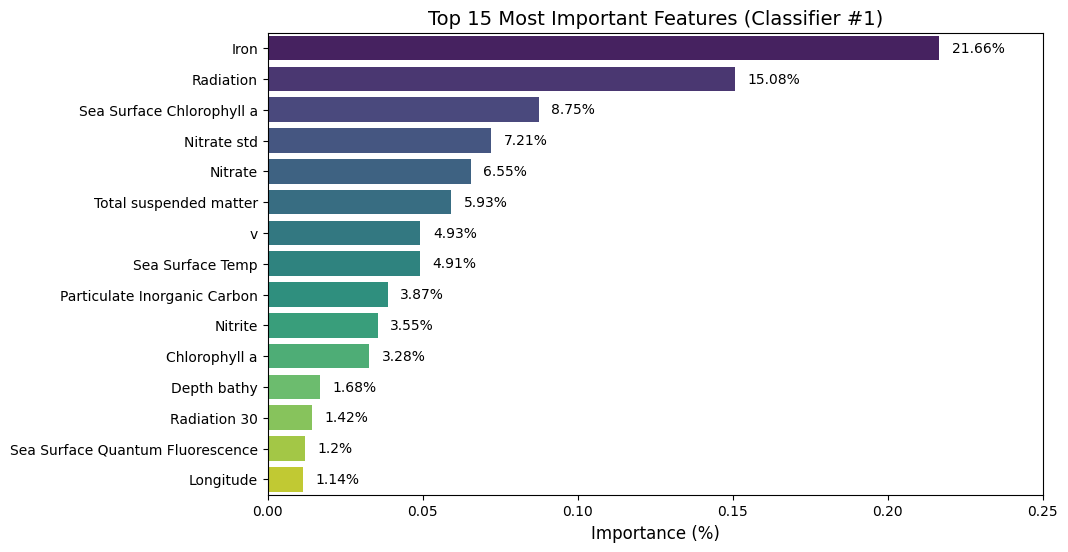

In [108]:
def plot_feature_importance(importance_df, title, plot_name, top_n=10, xlim=(0, 0.28)):
    # Sort the DataFrame by importance values
    importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)
    importance_df_sorted = importance_df_sorted.reset_index(drop=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df_sorted.iloc[:top_n],
                palette='viridis', hue='Feature', dodge=False, legend=False)
    plt.title(title, fontsize=14)
    plt.xlabel('Importance (%)', fontsize=12)
    plt.ylabel('')
    plt.xlim(xlim)
    
    # Convert importance values to percentages and add numbers beside each bar
    for index, row in importance_df_sorted.iloc[:top_n].iterrows():
        importance_percentage = round(row['Importance'] * 100, 2)
        plt.text(row['Importance'] + 0.004, index, f"{importance_percentage}%",
                 ha='left', va='center')

    plt.savefig(f'/Users/annaolsen/Desktop/Speciale/DS_thesis/{plot_name}.png', bbox_inches='tight', dpi=200)

    plt.show()



# Plot feature importance for 'MHWs' prediction
plot_feature_importance(mean_importance_df1.iloc[:27],
                        "Top 15 Most Important Features (Classifier #1)",
                        "feat_imp_classifier_11",
                        top_n=15, xlim=(0, 0.25))



In [171]:


# # Feature importance per class
# class_feature_importance = {}

# # Iterate over each class
# for class_label in dt.classes_:
#     # Get binary labels for current class
#     y_train_binary = (y_train == class_label)
    
#     # Define Decision Tree Classifier for the current class
#     dt_class = DecisionTreeClassifier(random_state=42, class_weight='balanced')
    
#     # Train Decision Tree Classifier on binary labels
#     dt_class.fit(X_train, y_train_binary)
    
#     # Get feature importances for the current class
#     feature_importances_class = dt_class.feature_importances_
    
#     # Create a DataFrame to store feature importances for the current class
#     class_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_class})
    
#     # Sort the DataFrame by importance and select top 5 features
#     class_importance_df = class_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)
    
#     # Store the top 5 feature importances in the dictionary
#     class_feature_importance[class_label] = class_importance_df

# # # Plot top 5 feature importance for each class
# # for class_label, class_importance_df in class_feature_importance.items():
# #     plot_feature_importance(class_importance_df,
# #                             f'Top 10 Feature Importance for predicting class "{class_label}"',
# #                             top_n=10, xlim=(0, 1))



## Classifier #2 (MHWS or not? 0 vs. 1)

MHW_count
0    3528
1     756
2     177
3      13
Name: count, dtype: int64
MHW_count
0    3528
1     946
Name: count, dtype: int64
(3131, 56) (1343, 56) (3131,) (1343,)


/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_1255/1170884450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)


Cross-validation scores: [0.92633929 0.93080357 0.93973214 0.93303571 0.91722595 0.94407159
 0.91275168 0.9082774  0.95973154 0.92393736]
Mean CV accuracy: 0.9295906240012783
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1059
           1       0.77      0.97      0.86       284

    accuracy                           0.93      1343
   macro avg       0.88      0.95      0.91      1343
weighted avg       0.94      0.93      0.94      1343



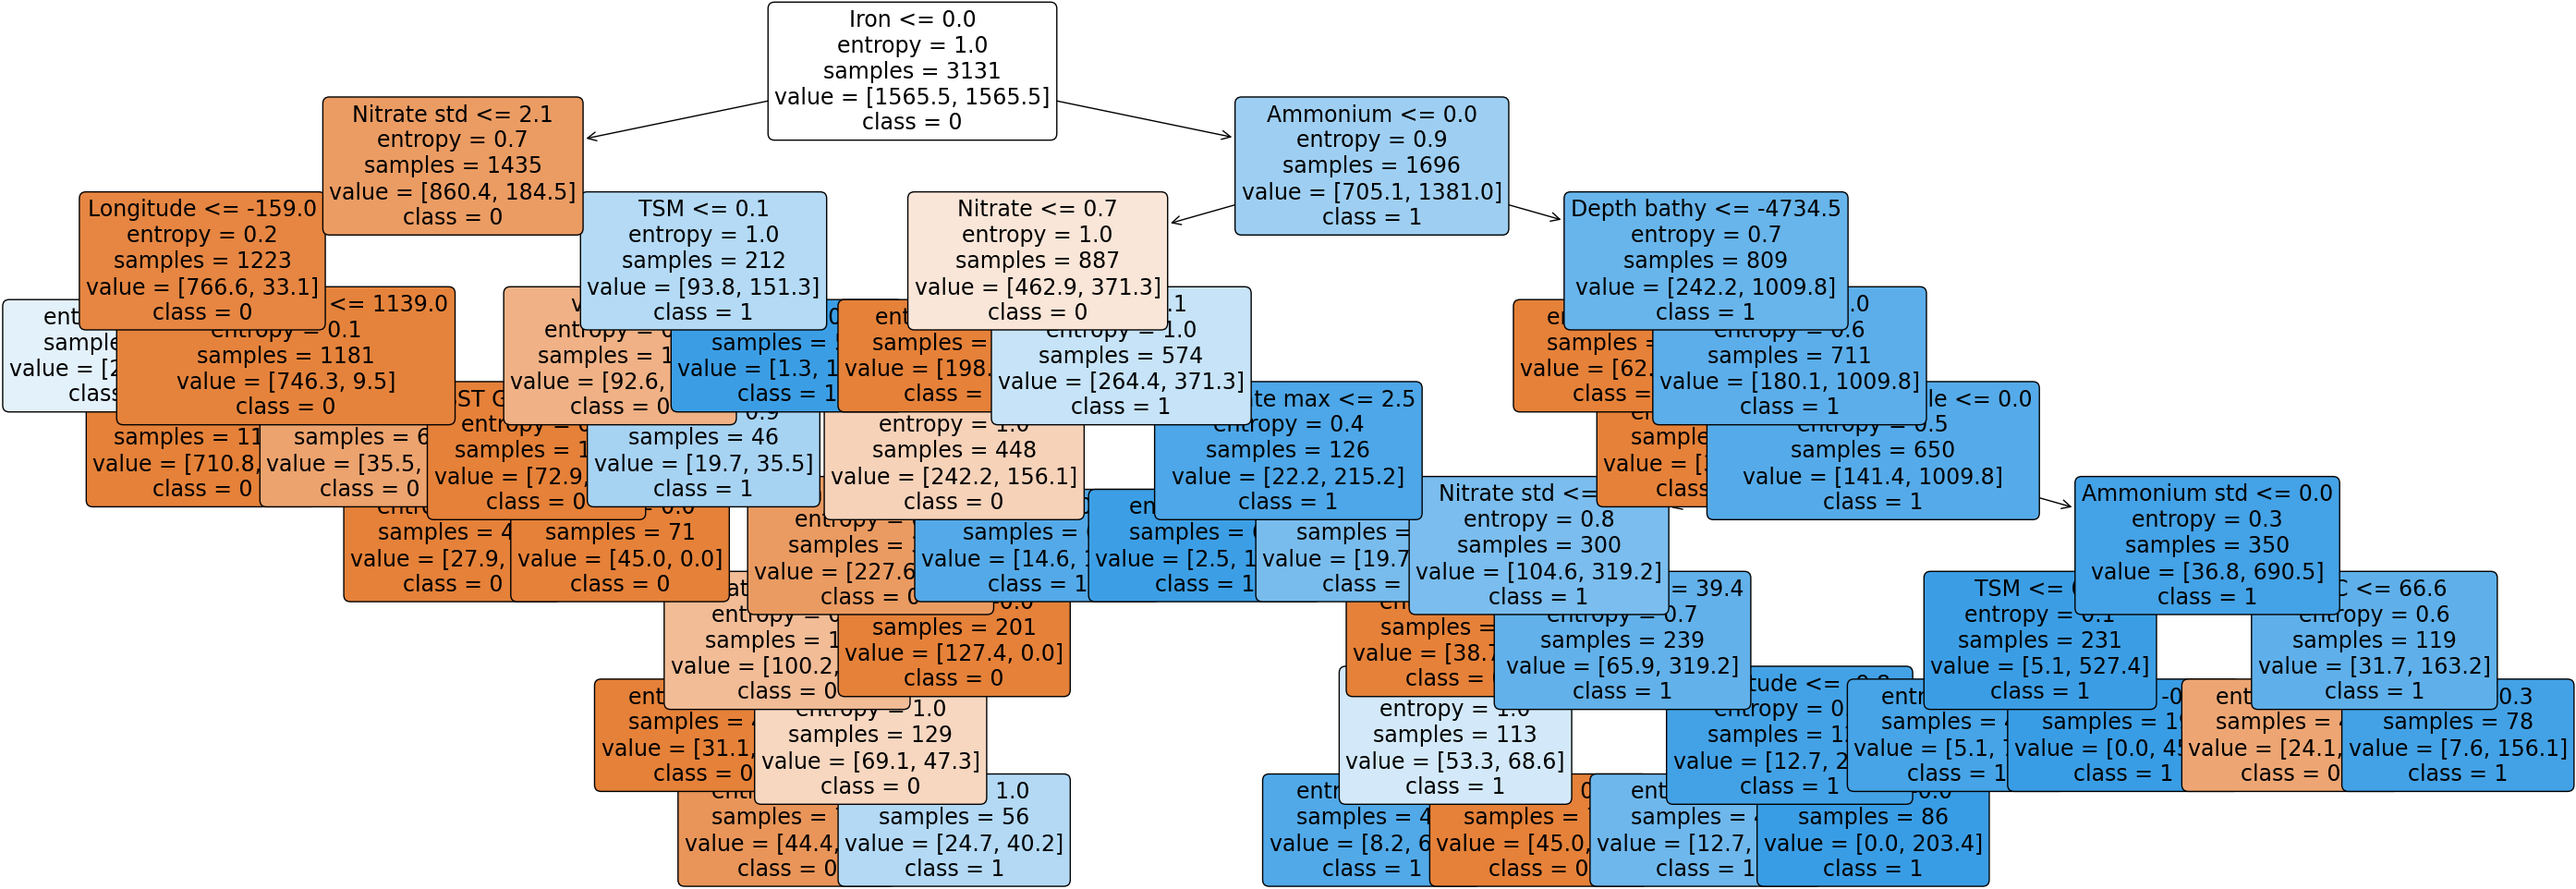

In [40]:
# Load dataset
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_3.csv")

# Use function to extract numeric columns
numeric_cols = numeric_columns(df)

df_num = df[numeric_cols]

print(df_num['MHW_count'].value_counts())


# Replace values in 'count'
count_replace = {
    0: '0',
    1: '1',
    2: '1',
    3: '1',
}

# Apply replacements to 'MHWs count'
df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)


print(df_num['MHW_count'].value_counts())

# Shuffle the DataFrame
shuffled_df_num = shuffle(df_num, random_state=33)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df_num.drop(['MHW_count'], axis=1)
y = shuffled_df_num['MHW_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=56)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Define Decision Tree Classifier with desired hyperparameters
clf = DecisionTreeClassifier(random_state=79, 
                             criterion='entropy',
                             class_weight='balanced',
                             max_depth=8, min_samples_split=60,
                             min_samples_leaf=40, max_features=None)

                           
# Define KFold with shuffle=True
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with shuffled data
cv_scores = cross_val_score(clf, X, y, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


# Train Decision Tree Classifier on full training data
clf.fit(X_train, y_train)

# Model Evaluation on test data
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Get the class names in the correct order
class_names = clf.classes_

# Plot Decision Tree
# plt.figure()
plt.figure(figsize=(35,12))
plot_tree(clf, filled=True, rounded=True, feature_names=X.columns,
          class_names=class_names, fontsize=17, precision=1,
          impurity=True, label='all')

# plt.savefig('/Users/annaolsen/Desktop/Speciale/DS_thesis/dt_binary_small.png', bbox_inches='tight', dpi=200)


plt.show()


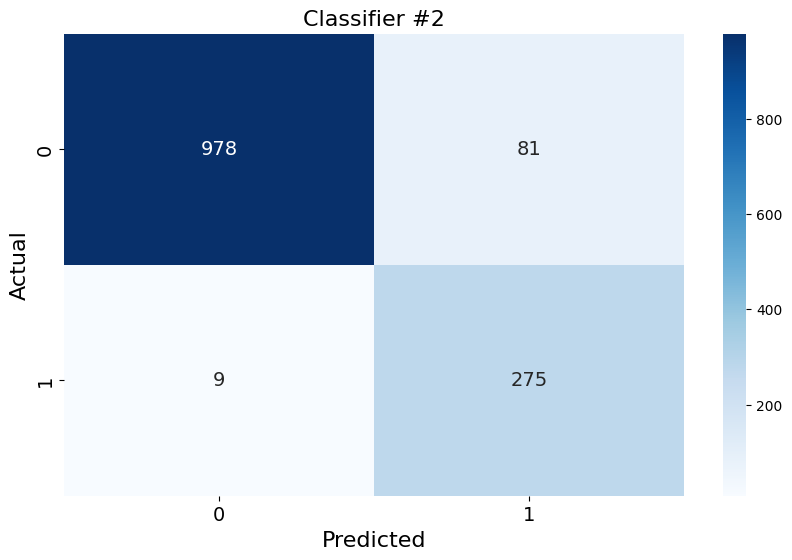

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with larger font size for x- and y-axis tick labels
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=clf.classes_, yticklabels=clf.classes_,
            annot_kws={"size": 14})  # Set font size for annotations

plt.xlabel('Predicted', fontsize=16)  # Set font size for x-axis label
plt.ylabel('Actual', fontsize=16)  # Set font size for y-axis label
plt.title('Classifier #2', fontsize=16)  # Set font size for title

# Set font size for x- and y-axis tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('/Users/annaolsen/Desktop/Speciale/DS_thesis/cm_classifier2.png', bbox_inches='tight', dpi=200)

plt.show()


### Try different random_state seeds (0 vs 1)

In [101]:
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_4.csv")

# Use function to extract numeric columns
numeric_cols = numeric_columns(df)

df_num = df[numeric_cols]

# Replace values in 'count'
count_replace = {
    0: '0',
    1: '1',
    2: '1',
    3: '1',
}

# Apply replacements to 'MHWs count'
df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)


print(df_num['MHW_count'].value_counts())


# Set the number of iterations
num_iterations = 1000

# Define lists to store results
results = []

for i in range(num_iterations):
    # Shuffle the DataFrame with different random_state
    shuffled_df_num = shuffle(df_num, random_state=i)

    # Separate features (X) and labels (y) after shuffling
    X = shuffled_df_num.drop(['MHW_count'], axis=1)
    y = shuffled_df_num['MHW_count']

    # Split data into train and test sets with different random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=i, stratify=y)

    clf = DecisionTreeClassifier(random_state=i, 
                             criterion='entropy',
                             class_weight='balanced',
                             max_depth=8, min_samples_split=60,
                             min_samples_leaf=40, max_features=None)


    # Train Decision Tree Classifier on full training data
    clf.fit(X_train, y_train)

    # Model Evaluation on test data
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') 
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Get feature names and their importance
    feature_importance = clf.feature_importances_
    feature_names = X.columns.tolist()

    # Sort features by importance and select top 10
    sorted_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)[:40]

    # Append results to the list
    results.append({
        'Iteration': i + 1,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Top Important Features': sorted_features
    })

# Create a DataFrame from the results
results_df_2 = pd.DataFrame(results)

# Display the DataFrame
print(results_df_2.describe())

# for f in results_df['Top Important Features']:
#     print(f)


/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_1255/1590088217.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)


MHW_count
0    3528
1     946
Name: count, dtype: int64
         Iteration     Accuracy    Precision       Recall     F1 Score
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean    500.500000     0.917168     0.933563     0.917168     0.920873
std     288.819436     0.012530     0.007339     0.012530     0.011352
min       1.000000     0.859270     0.904545     0.859270     0.869022
25%     250.750000     0.909159     0.928436     0.909159     0.913153
50%     500.500000     0.918094     0.933836     0.918094     0.921394
75%     750.250000     0.925540     0.938507     0.925540     0.928564
max    1000.000000     0.952345     0.955701     0.952345     0.953092


In [102]:

# Calculate the mean importance for each feature across all iterations
all_features = [feat for sublist in results_df_2['Top Important Features'] for feat in sublist]
mean_importance = {}
for feature, importance in all_features:
    if feature not in mean_importance:
        mean_importance[feature] = 0
    mean_importance[feature] += importance

# Divide the sum by the number of iterations to get the mean importance
num_iterations = len(results_df_2)
for feature in mean_importance:
    mean_importance[feature] /= num_iterations

print("Mean Top Important Features:")
print(mean_importance)


# Convert mean_importance dictionary to DataFrame
mean_importance_df2 = pd.DataFrame(mean_importance.items(), columns=['Feature', 'Importance'])

# Sort the DataFrame by mean importance values in descending order
mean_importance_df2 = mean_importance_df2.sort_values(by='Importance', ascending=False)

print(mean_importance_df2[:5])


Mean Top Important Features:
{'Ammonium': 0.12566766498050883, 'Iron': 0.2105730139292375, 'Nitrate std': 0.10819349905010961, 'Nitrate': 0.09465432746084707, 'Depth bathy': 0.08908714242720481, 'Okubo-Weiss': 0.029584003477019036, 'Latitude': 0.03518694670416114, 'Total suspended matter': 0.06013402126342483, 'Strain sub-mesoscale': 0.023339915966003835, 'Radiation 8.1': 0.012742006543254818, 'Chlorophyll a': 0.010302821864893529, 'Sunshine duration': 0.007617650119477554, 'Particulate Organic Carbon': 0.003055122630406393, 'Ammonium std': 0.008599693074481897, 'Phosphate min': 0.00365247464390127, 'Radiation 30': 0.015985439354412125, 'Nitrite': 0.0033667624700860575, 'Longitude': 0.03713328346748465, 'Sea Surface Chlorophyll a': 0.009208495741092785, 'Particulate Inorganic Carbon': 0.0022406198335416824, 'Depth bot': 0.00035828313937671225, 'Depth top': 0.0011978280948764838, 'Functional evenness': 1.2979796630177047e-19, 'Functional richness': 2.7978167965197764e-19, 'Iron std': 0.

MHW_category
0    3528
1     701
2     211
3      34
Name: count, dtype: int64
MHW_count
0    3528
1     756
2     177
3      13
Name: count, dtype: int64
                     Feature  Importance
0                       Iron    0.216630
1                  Radiation    0.150761
2  Sea Surface Chlorophyll a    0.087499
3                Nitrate std    0.072093
4                    Nitrate    0.065465


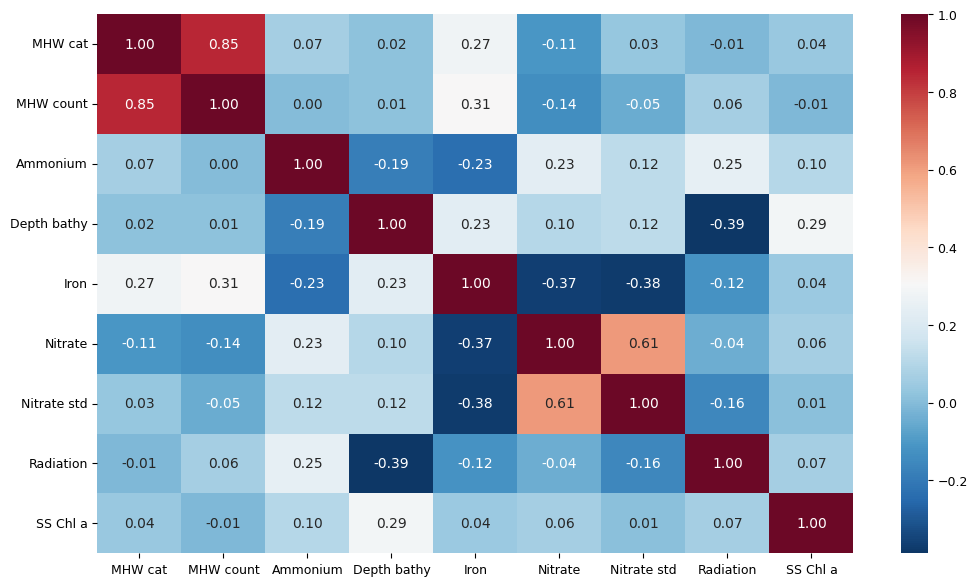

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_4.csv")

df['MHW_category'].fillna(0, inplace=True)

# Define the mapping of values to integers
mapping = {'Moderate': 1, 'Strong': 2, 'Severe': 3}

# Replace values in the 'category' column using the mapping
df['MHW_category'] = df['MHW_category'].replace(mapping)

# Convert the 'category' column to integer data type
df['MHW_category'] = df['MHW_category'].astype(int)

print(df['MHW_category'].value_counts())
print(df['MHW_count'].value_counts())

top_features_df1 = mean_importance_df1.sort_values(by='Importance', ascending=False).reset_index(drop=True)
top_features_df2 = mean_importance_df2.sort_values(by='Importance', ascending=False).reset_index(drop=True)


# Extract the top 15 most important features from each dataframe
# top_features_df1 = top_features_df1.head(12)
# top_features_df2 = top_features_df2.head(12)

top_features_df1 = top_features_df1.head(5)
top_features_df2 = top_features_df2.head(5)

print(top_features_df1)
# print(top_features_df2)

# Combine the features into a single list
all_top_features = list(set(top_features_df1['Feature']).union(set(top_features_df2['Feature'])))

#  Sort the features alphabetically
all_top_features.sort()

# Select 'MHW_count' and 'MHW_category' columns
columns_of_interest = ['MHW_category', 'MHW_count'] + all_top_features
selected_df = df[columns_of_interest]


# Rename the columns
selected_df = selected_df.rename(columns={'Particulate Inorganic Carbon': 'Part-Inorg-C',
                                          'Sea Surface Chlorophyll a': 'SS Chl a',
                                          'Chlorophyll a': 'Chl a',
                                          'Sea Surface Temp': 'SS Temp',
                                          'Total suspended matter': 'Tot-Susp-Mat',
                                          'MHW_category': 'MHW cat',
                                          'MHW_count': 'MHW count',
                                          'Strain sub-mesoscale': 'Str-Sub-Meso',

                                          })


# Create a correlation matrix using these features
correlation_matrix = selected_df.corr()


# # Plot the correlation matrix
# plt.figure(figsize=(16, 9))
# heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f",
#             annot_kws={"size": 9})
# plt.yticks(fontsize=10)  # Adjust the font size of y ticks
# plt.xticks(fontsize=9)  # Adjust the font size of x ticks
# plt.title('')

# # Move the color bar closer to the plot


# # Get the color bar object
# cbar = heatmap.collections[0].colorbar

# # Set the font size of the color bar labels
# cbar.ax.tick_params(labelsize=9)

# # Move the color bar closer to the plot
# plt.subplots_adjust(right=0.8)
# cbar_ax = heatmap.figure.axes[-1]
# cbar_ax.yaxis.label.set_size(9)



# Plot the correlation matrix
plt.figure(figsize=(14, 7))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f", alpha=0.97,
            annot_kws={"size": 10})
plt.yticks(fontsize=9)  # Adjust the font size of y ticks
plt.xticks(fontsize=9)  # Adjust the font size of x ticks
plt.title('')

# Move the color bar closer to the plot


# Get the color bar object
cbar = heatmap.collections[0].colorbar

# Set the font size of the color bar labels
cbar.ax.tick_params(labelsize=9)

# Move the color bar closer to the plot
plt.subplots_adjust(right=0.8)
cbar_ax = heatmap.figure.axes[-1]
cbar_ax.yaxis.label.set_size(9)



plt.savefig('/Users/annaolsen/Desktop/Speciale/DS_thesis/corr_matrix_top_5.png', bbox_inches='tight', dpi=200)


plt.show()


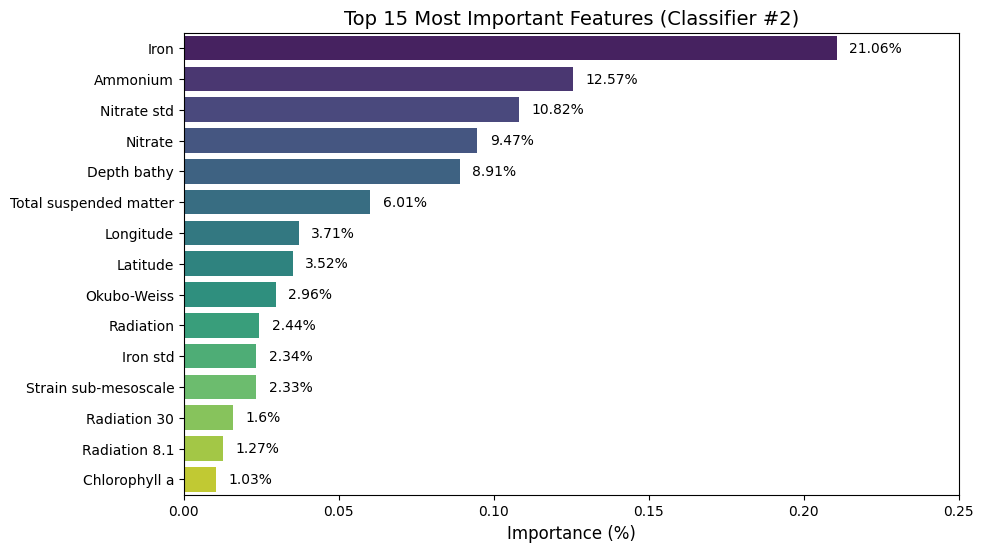

In [103]:

# Plot feature importance for 'MHWs' prediction
plot_feature_importance(mean_importance_df2.iloc[:27],
                        "Top 15 Most Important Features (Classifier #2)",
                        "feat_imp_classifier2",
                        top_n=15, xlim=(0, 0.25))


#### GridSearch (0 vs 1)

In [105]:
# Load dataset
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_2.csv")

# Use function to extract numeric columns
numeric_cols = numeric_columns(df)

df_num = df[numeric_cols]

# print(df_num['MHW_count'].value_counts())

# Replace values in 'count'
count_replace = {
    0: '0',
    1: '1',
    2: '1',
    3: '1',
}

# Apply replacements to 'MHWs count'
df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)

print(df_num['MHW_count'].value_counts())

# Shuffle the DataFrame
shuffled_df_num = shuffle(df_num, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df_num.drop(['MHW_count'], axis=1)
y = shuffled_df_num['MHW_count']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# Define the parameter grid
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [8, 9, 10],
    'min_samples_split': [45, 50, 55],
    'min_samples_leaf': [25, 28, 30, 35, 40],
    'max_features': [None, 50]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=72, class_weight='balanced')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, verbose=2,
                           param_grid=param_grid, cv=7, n_jobs=-1,
                           scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Calculate precision, recall, and F1-score
predictions = grid_search.predict(X_test)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

MHW_count
0    3528
1     946
Name: count, dtype: int64
(3131, 56) (1343, 56) (3131,) (1343,)
Fitting 7 folds for each of 90 candidates, totalling 630 fits


/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_1633/3810423630.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)


[CV] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=25, min_samples_split=45; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=25, min_samples_split=45; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=25, min_samples_split=45; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=25, min_samples_split=45; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=25, min_samples_split=45; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=25, min_samples_split=45; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=25, min_samples_split=45; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=25, min_samples_split=50; total time=   0.1s
[CV] END criterion=entro

In [110]:
# Extract results from grid search
results_df = pd.DataFrame(grid_search.cv_results_)

# Extract parameter names
param_names = list(param_grid.keys())

# Create separate columns for each parameter
for param_name in param_names:
    results_df[param_name] = results_df['params'].apply(lambda x: x[param_name])

# Select relevant columns
score_columns = [col for col in results_df.columns if 'mean_test_' in col]
columns_to_keep = param_names + score_columns

# Sort results by accuracy in descending order
results_df = results_df.sort_values(by=score_columns[0], ascending=False)

results_df = results_df[columns_to_keep]

print(results_df['mean_test_score'].max())

best = results_df[results_df['mean_test_score'] > 0.93]

# print(best)

# Sort the results DataFrame by the specified columns
best = best.sort_values(by=['max_depth', 'min_samples_leaf', 'min_samples_split', 'max_features'], ascending=[True, False, False, True])

# print(best[:15])

# Select the top row (combination with the highest values for min_samples_split and min_samples_leaf,
# and the lowest values for max_depth and max_features)
best_combination = best.iloc[1]

# print("Best combination:")
print(best_combination)


0.9393191001232708
criterion             entropy
max_depth                   8
min_samples_split          50
min_samples_leaf           25
max_features              NaN
mean_test_score      0.933574
Name: 1, dtype: object


### Something else...

In [33]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df[:10])

                        Feature  Importance
0                          Iron    0.177928
1                   Nitrate std    0.116668
2                     Radiation    0.106250
3                     Longitude    0.095777
4         Sea surface temp grad    0.088884
5                      Iron std    0.074797
6  Particulate Inorganic Carbon    0.054684
7             Sunshine duration    0.047054
8                             v    0.046328
9    Particulate Organic Carbon    0.040321


### Function to plot feature importance

### Feature importance (MHWs number)